In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def phi(x):
    return 2 / (1 + np.exp(-x)) - 1

def phiPrime(phi):
    return (1 + phi)*(1 - phi) / 2

In [3]:
def genDataset1(train_N = 100, test_N = 100):
    """
    Generates a custom dataset for a classification problem with 2 classes.

    Args:
        train_N: number of training samples.
        test_N: number of testing samples.
        
    Returns:
        Tuple with the training data inputs, training data outputs, test data inputs and test data outputs.
        Input matrices have a shape of 2 x samples and output matrices a shape of  1 x samples.
    """
    # Initialize distribution parameters
    mu1 = [-4, -4]
    mu2 = [0, 0]
    mu3 = [4, 4]
    cov1 = [[1.5, -0.8],[-0.8, 1.5]]
    
    # Create training data
    class1_cluster_N = int(train_N / 4)
    class2_cluster_N = int(train_N / 2)
    X1_train = np.random.multivariate_normal(mu1, cov1, class1_cluster_N)
    X2_train = np.random.multivariate_normal(mu3, cov1,  class1_cluster_N)
    X3_train = np.random.multivariate_normal(mu2, cov1,  class2_cluster_N)
    X_train = np.concatenate((X1_train, X2_train, X3_train)).T
    T1_train = np.ones((1, class1_cluster_N * 2))
    T2_train = np.full((1, class2_cluster_N), -1)
    T_train = np.concatenate((T1_train, T2_train), axis = 1)
        
    # Create testing data
    class1_cluster_N = int(test_N / 4)
    class2_cluster_N = int(test_N / 2)
    X1_test = np.random.multivariate_normal(mu1, cov1, class1_cluster_N)
    X2_test = np.random.multivariate_normal(mu3, cov1,  class1_cluster_N)
    X3_test = np.random.multivariate_normal(mu2, cov1,  class2_cluster_N)
    X_test = np.concatenate((X1_test, X2_test, X3_test)).T
    T1_test = np.ones((1, class1_cluster_N * 2))
    T2_test = np.full((1, class2_cluster_N), -1)
    T_test = np.concatenate((T1_test, T2_test), axis = 1)
    
    return (X_train, T_train, X_test, T_test)


In [24]:
def genDataset2(train_N = 100, test_N = 100):
    """
    Generates a custom dataset for a classification problem with 2 classes.

    Args:
        train_N: number of training samples.
        test_N: number of testing samples.
        
    Returns:
        Tuple with the training data inputs, training data outputs, test data inputs and test data outputs.
        Input matrices have a shape of 2 x samples and output matrices a shape of  1 x samples.
    """
    # Initialize distribution parameters
    mu1 = [-1.8, -1.5]
    mu2 = [2, 2]
    cov1 = [[.5, 0],[0, .5]]
    
    # Create training data
    class_cluster_N = int(train_N / 2)
    X1_train = np.random.multivariate_normal(mu1, cov1, class_cluster_N)
    X2_train = np.random.multivariate_normal(mu2, cov1,  class_cluster_N)
    X_train = np.concatenate((X1_train, X2_train)).T
    T1_train = np.ones((1, class_cluster_N))
    T2_train = np.full((1, class_cluster_N), -1)
    T_train = np.concatenate((T1_train, T2_train), axis = 1)
    
    # Create testing data
    class_cluster_N = int(test_N / 2)
    X1_test = np.random.multivariate_normal(mu1, cov1, class_cluster_N)
    X2_test = np.random.multivariate_normal(mu2, cov1,  class_cluster_N)
    X_test = np.concatenate((X1_test, X2_test)).T
    T1_test = np.ones((1, class_cluster_N))
    T2_test = np.full((1, class_cluster_N), -1)
    T_test = np.concatenate((T1_test, T2_test), axis = 1)
    
    return (X_train, T_train, X_test, T_test)




In [5]:
def scatterPlotData(X, T):
    """Creates scatter plot for data given inputs X and target outputs T (with -1 and 1 values)"""
    inputDims = X.shape[0]
    sampleNo = X.shape[1]
    X1 = X[0].reshape((1, sampleNo))
    X2 = X[1].reshape((1, sampleNo))
    plt.scatter(X1[T == 1], X2[T == 1], color = 'r')
    plt.scatter(X1[T == -1], X2[T == -1], color = 'b')
    plt.show()

In [19]:
def scatterPlotPredData(X, T, W):
    """
        Creates scatter plot for data given inputs X and target outputs T (with -1 and 1 values). 
        Also plots the decision boundaries given by the weights of the hidden layer neurons W.    
    """
    inputDims = X.shape[0]
    sampleNo = X.shape[1]
    hiddenNeurons = W.shape[0]
    
    axes = plt.gca()
    axes.set_ylim([-7,7])
    
    print(W)
    x = np.linspace(-6,6, 10)
    for i in range(hiddenNeurons):
        w = W[i]
        slope = -(w[0]/w[1]) 
        intercept = -w[2]/w[1]
        plt.plot(x, x * slope + intercept)
        
    X1 = X[0].reshape((1, sampleNo))
    X2 = X[1].reshape((1, sampleNo))
    plt.scatter(X1[T == 1], X2[T == 1], color = 'r')
    plt.scatter(X1[T == -1], X2[T == -1], color = 'b')
    plt.show()

In [7]:
def shuffleData(X, T):
    """Shuffles the inputs and their labels"""
    dimNo = X.shape[0]
    sampleNo = X.shape[1]
    concatMatrix = np.concatenate((X, T), axis = 0)
    np.random.shuffle(concatMatrix.T)
    return (concatMatrix[:dimNo,:], concatMatrix[-1,:].reshape((1, sampleNo)))

In [82]:
def backPropagation(X_tr, T_tr, W, V, epoch = 200, lrate = 0.01, epsilon = 10e-6, momentum = None, verbose = 'N'):
    """
    Implementation of back propagation for a two-layered perceptron network.
    
    Args:
        X_tr: training dataset inputs with dimensions MxN
        T_tr: training dataset outputs with dimensions 1xN
        W: weights of the hidden layer with dimensions HxM
        V: weights of the output layer with dimensions OxH
        epoch: maximum number of training epochs
        lrate: learning rate
        epsilon: small value used for convergence
        verbose: Prints messages if equal to 'Y' and omits them if equal to 'N'.
    """    
    hiddenNeurons = W.shape[0]
    sampleNo = X_tr.shape[1]
    prevErrorRate = 1 + epsilon
    psi = 0
    theta = 0
    errors = []
    for i in range(epoch):
        # Forward pass
        H = phi(W.dot(X_tr)) # First layer output
        H = np.concatenate((H, np.ones((1, sampleNo))), axis = 0) # Add extra dimension for bias in output
        O = phi(V.dot(H)) # Second layer (final) output
        
        # Backward pass
        deltaO = (O - T_tr) * phiPrime(O)
        deltaH = (V.T.dot(deltaO)) * phiPrime(H)
        deltaH = deltaH[:hiddenNeurons, :] # Remove row for bias term

        
        
        # Use momentum if it's enabled
        if momentum is not None:
            theta = momentum * theta - (1 - momentum) * deltaH.dot(X_tr.T)
            psi = momentum * psi - (1 - momentum) * deltaO.dot(H.T)
            
        # Weight update
        if momentum is None:
            W -= lrate * deltaH.dot(X_tr.T)
            V -= lrate * deltaO.dot(H.T)
        else:
            W += lrate * theta
            V += lrate * psi
            
        T_pred = classify(X_tr, W, V)
        Accuracy = T_tr[T_tr == T_pred].shape[0] / sampleNo
        errorRate = 1 - Accuracy
        errors.append(errorRate)
        if verbose == 'Y':
            print("Epoch: " + str(i) + "-------- Misclassification rate: " + str(errorRate))
    
        if abs(errorRate - prevErrorRate) < epsilon:
            break

        prevErrorRate = errorRate
        
    print("Backpropagation training finished achieving a training error rate equal to: " + str(errorRate))
    print("Final number of learning epochs: " + str(i))
            
    return W,V, errors
    

In [36]:
def classify(X, W, V):
    """
    Classifies X with a two layered neural network.
    
    Args:
        X:training input matrix
        W:hidden layer weights
        V:output layer weights
        
    Returns:
        A vector with the labels of each sample in X
    """
    sampleNo = X.shape[1]
    H = phi(W.dot(X))
    H = np.concatenate((H, np.ones((1, sampleNo))), axis = 0) # Add extra dimension for bias in output
    T = phi(V.dot(H))
    return np.where(T < 0, -1, 1)
   

Backpropagation training finished achieving a training error rate equal to: 0.0
Final number of learning epochs: 26


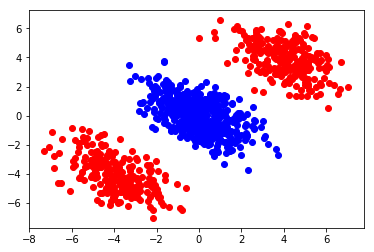

[[ 0.8837552   0.62172693 -2.05271475]
 [-1.30348071 -2.2160255  -6.15952084]]


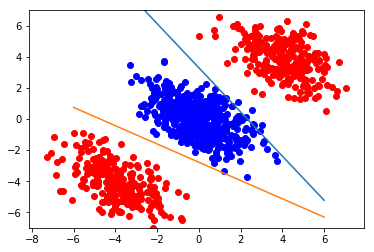

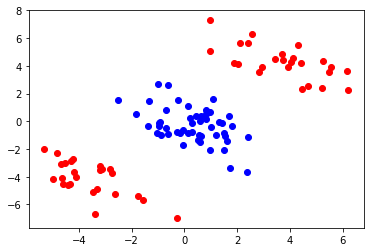

[[ 0.8837552   0.62172693 -2.05271475]
 [-1.30348071 -2.2160255  -6.15952084]]


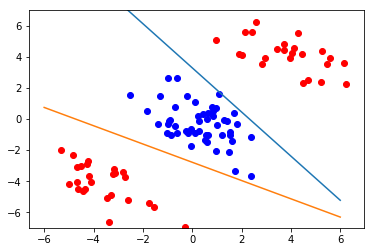

In [88]:
# Seed the random generator
np.random.seed(0)

# Generate training and test datasets
X_tr, T_tr, X_ts, T_ts = genDataset1(train_N = 1000, test_N = 100)
inputDims = X_tr.shape[0]
# Number of samples might not be ones provided to the function above due to rounding
train_N = X_tr.shape[1]
test_N = X_ts.shape[1]

# Add bias dimension to the input
X_tr = np.concatenate((X_tr, np.ones((1, train_N))), axis = 0)
X_ts = np.concatenate((X_ts, np.ones((1, test_N))), axis = 0)
#print(X_tr.shape)
#print(X_ts.shape)


# Shuffle training data
X_tr, T_tr = shuffleData(X_tr, T_tr)


# Initialize number of neurons for each layer
hiddenCount = 2
outputCount = 1
# Initialize weight matrices for each layer adding one extra weight to each neuron for the bias
W = np.random.normal(0, 1,(hiddenCount, inputDims + 1)) 
V = np.random.normal(0, 1,(outputCount, hiddenCount + 1)) 
# Train the two layered network with back propagation
W, V, errors = backPropagation(X_tr, T_tr, W, V, epoch = 200, epsilon = 10e-15, verbose = "N",momentum=0.9)
T_pred_tr = classify(X_tr, W, V)
T_pred_ts = classify(X_ts, W, V)


# Plot training and test data with their true and predicted classes
scatterPlotData(X_tr, T_tr)
scatterPlotPredData(X_tr, T_pred_tr, W)
scatterPlotData(X_ts, T_ts)
scatterPlotPredData(X_ts, T_pred_ts, W)

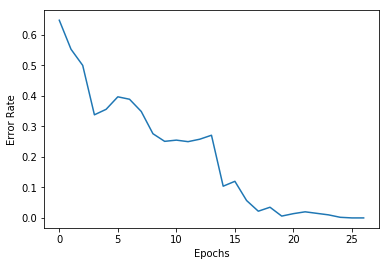

In [76]:
%matplotlib inline
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error Rate")